In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
start = 0
end = 2
step = 0.02
weight = 0.3
bias = 0.9

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

In [5]:
# put data on GPU
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

X_train.device, y_train.shape, X_test.shape, y_test.shape

(device(type='cuda', index=0),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

In [6]:
# build a linear regression model from nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)  

model = LinearRegressionModel()
model.state_dict()    

OrderedDict([('linear_layer.weight', tensor([[-0.8230]])),
             ('linear_layer.bias', tensor([0.0262]))])

In [7]:
# create a norm 1 loss function and a SGD optimizer
loss_fun = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [8]:
model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [9]:
next(model.parameters()).device

device(type='cuda', index=0)

In [10]:
epochs = 300

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train)
  loss = loss_fun(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## test
  model.eval()
  
  with torch.inference_mode():
    y_pred_test = model(X_test)
    loss_test = loss_fun(y_pred_test, y_test)

    if epoch % 20 == 0:
      print(f"epoch = {epoch}, train_loss = {loss}, test_loss={loss_test}")      



epoch = 0, train_loss = 1.760976791381836, test_loss=2.859809637069702
epoch = 20, train_loss = 1.4361568689346313, test_loss=2.3769893646240234
epoch = 40, train_loss = 1.1113370656967163, test_loss=1.8941696882247925
epoch = 60, train_loss = 0.7865171432495117, test_loss=1.411349892616272
epoch = 80, train_loss = 0.46169739961624146, test_loss=0.9285299181938171
epoch = 100, train_loss = 0.1830371469259262, test_loss=0.4781324565410614
epoch = 120, train_loss = 0.08637311309576035, test_loss=0.21301816403865814
epoch = 140, train_loss = 0.063587486743927, test_loss=0.12839375436306
epoch = 160, train_loss = 0.04537663981318474, test_loss=0.08816482871770859
epoch = 180, train_loss = 0.027191156521439552, test_loss=0.05201379209756851
epoch = 200, train_loss = 0.009005681611597538, test_loss=0.015862787142395973
epoch = 220, train_loss = 0.009720615111291409, test_loss=0.007276719901710749
epoch = 240, train_loss = 0.009720615111291409, test_loss=0.007276719901710749
epoch = 260, trai

In [22]:
def plot_predictions(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(X_train, y_train, s=4, c="b", label="Training data")
  plt.scatter(X_test, y_test, s=4, c="g", label="Testing data")

  if predictions is not None:
    plt.scatter(X_test, predictions, s=4, c="r", label="predict data")
  plt.legend()   

In [18]:
model.eval()
with torch.inference_mode():
  model_preds = model(X_test)
model_preds

tensor([[1.3645],
        [1.3704],
        [1.3762],
        [1.3821],
        [1.3879],
        [1.3938],
        [1.3996],
        [1.4055],
        [1.4114],
        [1.4172],
        [1.4231],
        [1.4289],
        [1.4348],
        [1.4406],
        [1.4465],
        [1.4523],
        [1.4582],
        [1.4641],
        [1.4699],
        [1.4758]], device='cuda:0')

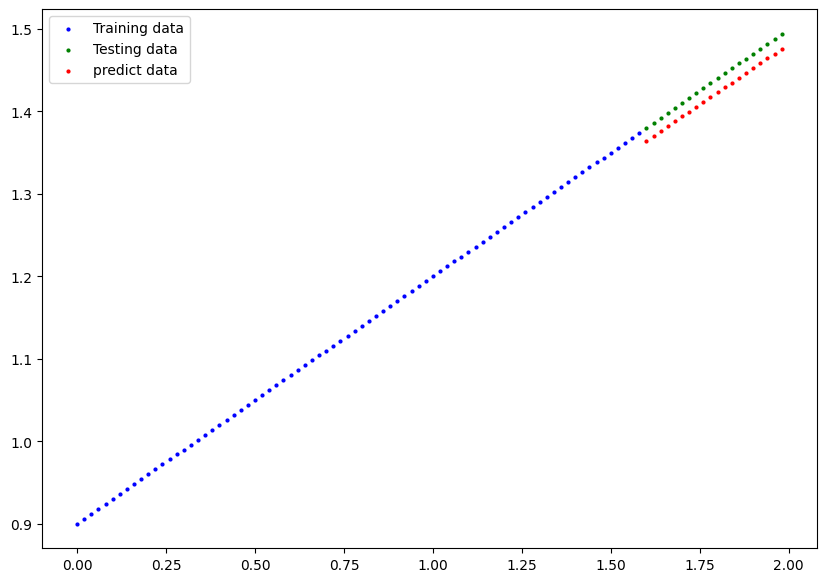

In [23]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions=model_preds.cpu())

In [25]:
from pathlib import Path

model_dir = Path("models")
model_dir.mkdir(parents=True, exist_ok=True)

mode_name = "LM_exercise.pth"
model_path = model_dir / mode_name

torch.save(obj=model.state_dict(), f=model_path)

print(f"save model to {model_path}")

save model to models/LM_exercise.pth


In [27]:
# load model
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.to(device)
loaded_model.eval()
with torch.inference_mode():
  loaded_preds = loaded_model(X_test)
loaded_preds == model_preds  

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')